<a href="https://colab.research.google.com/github/TejaswiniShet/MileagePrediction/blob/main/Mileage_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Mileage Prediction: Regression Analysis**


-------------

## **Objective**

The objective of this project is to predict vehicle mileage ('mpg') using linear regression with features 'displacement', 'horsepower', 'weight', and 'acceleration'.

## **Data Source**

https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv

## **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Import Data**

In [ ]:
dataset = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

## **Describe Data**

In [ ]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
dataset.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


## **Data Visualization**

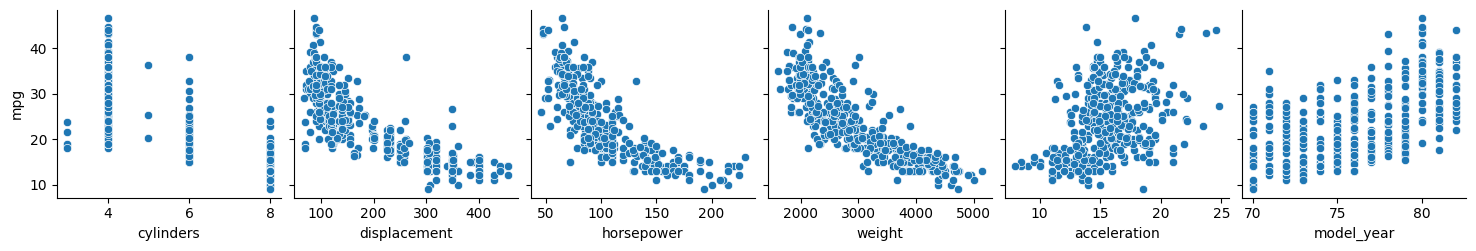

In [ ]:
sns.pairplot(dataset,x_vars=['cylinders','displacement','horsepower','weight','acceleration','model_year'],y_vars='mpg')

<Axes: xlabel='weight', ylabel='mpg'>

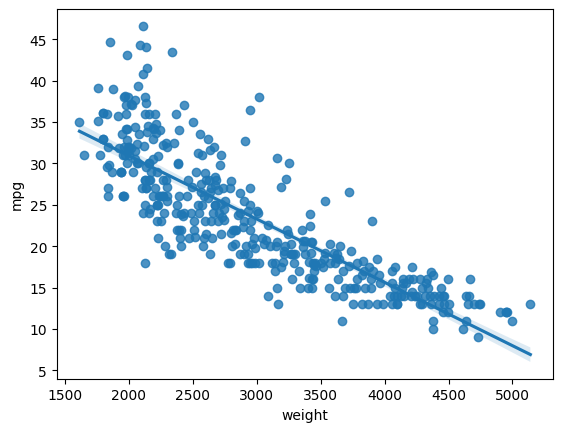

In [ ]:
sns.regplot(x='weight',y='mpg',data=dataset)

## **Data Preprocessing**

In [ ]:
dataset = dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


## **Define Target Variable (y) and Feature Variables (X)**

In [ ]:
dataset.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
y=dataset['mpg']
y.shape

(392,)

In [ ]:
X=dataset[['displacement', 'horsepower', 'weight','acceleration']]
X.shape

(392, 4)

## **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=2529)

## **Modeling**

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.intercept_

45.10570942699835

In [ ]:
model.coef_

array([-0.0101203 , -0.04389329, -0.00484238, -0.04171959])

**Mileage = 45.105 - displacement * 0.0101203 - horsepower * 0.04389329 - weight * 0.00484238 - acceleration * 0.04171959**

## **Prediction**

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([18.51865637, 15.09305675, 14.30128789, 23.6753321 , 29.7546115 ,
       23.68796629, 26.61066644, 24.56692437, 15.06260986, 11.94312046,
       24.08050053, 27.96518468, 31.66130278, 31.01309132, 18.32428976,
       19.32795009, 28.08847536, 32.1506879 , 31.15859692, 27.15792144,
       18.82433097, 22.54580176, 26.15598115, 32.36393869, 20.74377679,
        8.78027518, 22.19699435, 18.20614294, 25.00052718, 15.26421552,
       23.13441082, 17.10542257,  9.87180062, 30.00790415, 20.41204655,
       29.11860245, 24.4305187 , 21.72601835, 10.51174626, 13.12426391,
       21.41938406, 19.96113872,  6.19146626, 17.79025345, 22.5493033 ,
       29.34765021, 13.4861847 , 25.88852083, 29.40406946, 22.41841964,
       22.07684766, 16.46575802, 24.06290693, 30.12890046, 10.11318121,
        9.85011438, 28.07543852, 23.41426617, 20.08501128, 30.68234133,
       20.92026393, 26.78370281, 22.9078744 , 14.15936872, 24.6439883 ,
       26.95515832, 15.25709393, 24.11272087, 30.80980589, 14.97

## **Model Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [ ]:
mean_absolute_error(y_test,y_pred)

3.3286968643244115

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

0.14713035779536746

In [ ]:
r2_score(y_test,y_pred)

0.7031250746717691

## **Explaination**

The goal of this project is to predict vehicle mileage ('mpg') using a linear regression model. The model is built on four key features: 'displacement', 'horsepower', 'weight', and 'acceleration'.

The model is represented by the equation:


Mileage = 45.105 - displacement * 0.0101203 - horsepower * 0.04389329 - weight * 0.00484238 - acceleration * 0.04171959

Intercept (45.105):This is the baseline mileage when all features are zero.


Displacement, Horsepower, Weight, Acceleration: These features have negative coefficients, indicating that increases in each of these variables are associated with a decrease in mileage.

The coefficients quantify the impact of each feature on mileage:

Displacement: Each unit increase in displacement decreases mileage by 0.0101 units.

Horsepower: Each unit increase in horsepower decreases mileage by 0.0439 units.

Weight: Each unit increase in weight decreases mileage by 0.0048 units.

Acceleration: Each unit increase in acceleration decreases mileage by 0.0417 units.

This model helps estimate how changes in these features affect vehicle mileage, aiding in fuel efficiency analysis and vehicle performance evaluation.

